## Single path absolute tropospheric delay time series

In [1]:
%matplotlib inline
import os
import datetime as dt
import numpy as np
from matplotlib import pyplot as plt, colorbar, ticker, colors
from mintpy.utils import ptime, readfile, utils as ut, plot as pp
plt.rcParams.update({'font.size': 12})

data_dir = os.path.expanduser('~/data/geolocation/ChileSenDT156/mintpy_offset/inputs')
work_dir = os.path.expanduser('~/Papers/2021_Geolocation/figs_src/tropo')
os.chdir(work_dir)
print('Go to directory:', work_dir)

# file info
lookup_file = os.path.join(data_dir, 'geometryRadar.h5')
tropo_files = [os.path.join(data_dir, 'ERA5.h5'),
               os.path.join(data_dir, 'ERA5wet.h5'),
               os.path.join(data_dir, 'ERA5dry.h5')]
lat, lon = -21.29, -69.22

Go to directory: /Users/yunjunz/Papers/2021_Geolocation/figs_src/tropo


In [2]:
dates, tsT = ut.read_timeseries_lalo(lat, lon, tropo_files[0], lookup_file=lookup_file, zero_first=False)[:2]
dates, tsW = ut.read_timeseries_lalo(lat, lon, tropo_files[1], lookup_file=lookup_file, zero_first=False)[:2]
dates, tsD = ut.read_timeseries_lalo(lat, lon, tropo_files[2], lookup_file=lookup_file, zero_first=False)[:2]
print('Done.')

input lat / lon: -21.29 / -69.22
corresponding y / x: 109 / 220
input lat / lon: -21.29 / -69.22
corresponding y / x: 109 / 220
input lat / lon: -21.29 / -69.22
corresponding y / x: 109 / 220
Done.


save figure to file: /Users/yunjunz/Papers/2021_Geolocation/figs_src/tropo/tropo_TS.pdf


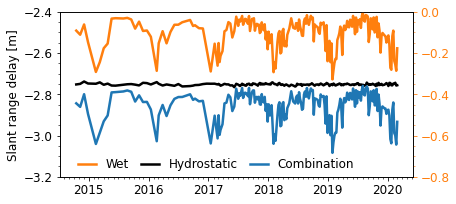

In [4]:
fig, ax1 = plt.subplots(figsize=[6.5, 3])
ax2 = ax1.twinx()
h1, = ax2.plot(dates, tsW, '-', color='C1', lw=2.5, label='Wet')
h2, = ax1.plot(dates, tsD, '-', color='k', lw=2.5, label='Hydrostatic')
h3, = ax1.plot(dates, tsT, '-', color='C0', lw=2.5, label='Combination')

# axis format
pp.auto_adjust_xaxis_date(ax1, dates, every_year=1, buffer_year=None)
ax2.spines['right'].set_position(('axes', 1.0))
ax2.tick_params(which='both', axis='y', colors='C1')
for ax in [ax1, ax2]:
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax1.set_ylabel('Slant range delay [m]')
#ax2.set_ylabel('Slant range delay [m]', color='C1')
# ylim
y1min, y2max, yspan = -3.2, 0.0, 0.8
ax1.set_ylim(y1min, y1min + yspan)
ax2.set_ylim(y2max - yspan, y2max)
fig.tight_layout()
ax1.legend(handles=(h1,h2,h3), ncol=3, loc='upper left', bbox_to_anchor=(0.02, 0.18),
           handlelength=1.5, columnspacing=1.0, frameon=False)

# output
out_fig = os.path.join(work_dir, 'tropo_TS.pdf')
print('save figure to file:', out_fig)
fig.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=600)
plt.show()